In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
import plotly.express as px
from pypfopt import EfficientFrontier
#conda install -c plotly chart-studio
from chart_studio import plotly
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from sympy import symbols, solve
from plotly.subplots import make_subplots

# Importing data

In [82]:
esg_data = pd.read_excel('data_esg.xlsx', header=[0,1], index_col=0)


(41, 17)

In [ ]:
data_lastP = esg_data.iloc[:,:41].T
esg_disclosure = esg_data.iloc[:,42:83].T
esg_env = esg_data.iloc[:,83:124].T
esg_soc = esg_data.iloc[:,124:165].T
esg_gov = esg_data.iloc[:, 165:206].T

In [84]:
# data_lastP.to_excel('LastP_tmp.xlsx')
# esg_disclosure.to_excel('ESG_disc_tmp.xlsx')
# esg_env.to_excel('ESG_env_tmp.xlsx')
# esg_soc.to_excel('ESG_soc_tmp.xlsx')
# esg_gov.to_excel('ESG_gov_tmp.xlsx')

In [104]:
df_lastPrice = pd.read_excel('LastPrice.xlsx', header=[0,1], index_col=0)
df_esgDisc = pd.read_excel('ESG_disc.xlsx', header=[0,1], index_col=0)
df_esgEnv = pd.read_excel('ESG_env.xlsx', header=[0,1], index_col=0)
df_esgSoc = pd.read_excel('ESG_soc.xlsx', header=[0,1], index_col=0)
df_esgGov = pd.read_excel('ESG_gov.xlsx', header=[0,1], index_col=0)
df_data = pd.read_excel('Data.xlsx', header=[0,1], index_col=0)
df_data

Last Price                                                 \
         2006-12-31  2007-12-31 2008-12-31  2009-12-31  2010-12-31   
AAPL         2.7500     7.07400    3.04800     7.52600    11.52000   
TSLA         0.0000     0.00000    0.00000     0.00000     1.77500   
MSFT        29.8600    35.60000   19.44000    30.48000    27.91000   
UEC          0.0000     3.06000    2.18000     3.78000     6.04000   
DIS         33.8144    32.28000   22.69000    32.25000    37.51000   
F            7.5100     6.73000    2.29000    10.00000    16.79000   
EBAY        13.8100    13.96890    5.87550     9.90330    11.71300   
MAERSKB   1647.3100  1878.78176  931.44229  1234.63323  1573.08887   
MCD         42.1800    58.91000   62.19000    62.44000    76.76000   
BA          64.1700    87.46000   42.67000    54.13000    65.26000   
KO          24.1300    30.68500   22.63500    28.50000    32.88500   
NKE         12.3788    16.06000   12.75000    16.51750    21.35500   
SHEL        34.9300    41.85480   26.30788    30.39054    33.34135   
NFLX         3.6900     3.80300    4.27000     7.87000    25.10000   
NVO         47.0500    12.97200   10.27800    12.77000    22.51400   
NVDA         6.1683     8.50500    2.01750     4.67000     3.85000   
GM           0.0000     0.00000    0.00000     0.00000    36.86000   
BP/         11.1100    12.19361    7.66645     9.68880     7.25839   
RYAAY       35.0300    40.45130   29.82560    27.49740    31.54870   
VWS          6.4000    21.78073   11.49382    12.21721     6.26601   
PCG         47.3300    43.09000   38.71000    44.65000    47.84000   
GOOGL       11.5200    17.30400    7.69900    15.51500    14.86400   
GOOG        11.5200    17.30000    7.70000    15.51000    14.86000   
VOW         85.5700   228.39753  350.80665   109.77091   140.45517   
ALV        155.0400   217.69346  105.85500   124.96439   117.94786   
ADS         37.7100    74.92822   38.30540    54.15840    64.84281   
RSG         27.1100    31.35000   24.79000    28.31000    29.86000   
NEE         13.6100    16.94500   12.58250    13.20500    12.99750   
NESN        43.3000    46.12792   39.37157    48.43690    58.43740   
EXC         44.1300    58.21480   39.65370    34.84760    29.69210   
PEP         62.5500    77.03000   54.77000    60.80000    65.33000   
MNST         5.6100     7.38200    5.58800     6.40000     8.71300   
CARLB       80.1000    98.26084   32.42696    73.99699    99.36308   
LMT         92.0700   105.26000   84.08000    75.35000    69.91000   
RTX         36.8800    45.14400   31.61400    40.93900    46.43000   
LHA         14.8700    19.09888   11.27155    12.02431    15.48089   
DAL             NaN    14.89000   11.46000    11.38000    12.60000   
PFE         24.5500    21.54690   16.78820    17.24320    16.59860   
JNJ         66.0200    66.70000   59.83000    64.41000    61.85000   
AMZN         1.9700     4.63200    2.56400     6.72600     9.00000   
BAC         53.3900    41.26000   14.08000    15.06000    13.34000   

                                                                      ...  \
          2011-12-30  2012-12-31  2013-12-31  2014-12-31  2015-12-31  ...   
AAPL        14.46400    19.00600    20.03600    27.59500    26.31500  ...   
TSLA         1.90400     2.25800    10.02900    14.82700    16.00100  ...   
MSFT        25.96000    26.70970    37.41000    46.45000    55.48000  ...   
UEC          3.06000     2.56000     2.00000     1.75000     1.06000  ...   
DIS         37.50000    49.79000    76.40000    94.19000   105.08000  ...   
F           10.76000    12.95000    15.43000    15.50000    14.09000  ...   
EBAY        12.76520    21.46380    23.09150    23.61970    27.48000  ...   
MAERSKB   1157.34675  1321.70687  1905.90254  1767.69623  1148.66194  ...   
MCD        100.33000    88.21000    97.03000    93.70000   118.14000  ...   
BA          73.35000    75.36000   136.49000   129.98000   144.59000  ...   
KO          34.98500    36.25000    41.31000    42.22000    42.96000  ... 

In [102]:
frames = [df_lastPrice,df_esgDisc, df_esgEnv, df_esgSoc, df_esgGov]
result_test = pd.concat(frames, axis=1)
result_test.to_excel('Data.xlsx')
result_test['Last Price']

,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-30
AAPL,2.7500,7.07400,3.04800,7.52600,11.52000,14.46400,19.00600,20.03600,27.59500,26.31500,28.95500,42.30800,39.43500,73.41300,132.69000,177.57000,129.93000
TSLA,0.0000,0.00000,0.00000,0.00000,1.77500,1.90400,2.25800,10.02900,14.82700,16.00100,14.24600,20.75700,22.18700,27.88900,235.22300,352.26000,386.90000
MSFT,29.8600,35.60000,19.44000,30.48000,27.91000,25.96000,26.70970,37.41000,46.45000,55.48000,62.14000,85.54000,101.57000,157.70000,222.42000,336.32000,239.82000
UEC,0.0000,3.06000,2.18000,3.78000,6.04000,3.06000,2.56000,2.00000,1.75000,1.06000,1.12000,1.77000,1.25000,0.91920,1.76000,3.35000,3.88000
DIS,33.8144,32.28000,22.69000,32.25000,37.51000,37.50000,49.79000,76.40000,94.19000,105.08000,104.22000,107.51000,109.65000,144.63000,181.18000,154.89000,86.88000
F,7.5100,6.73000,2.29000,10.00000,16.79000,10.76000,12.95000,15.43000,15.50000,14.09000,12.13000,12.49000,7.65000,9.30000,8.79000,20.77000,11.63000
EBAY,13.8100,13.96890,5.87550,9.90330,11.71300,12.76520,21.46380,23.09150,23.61970,27.48000,29.69000,37.74000,28.07000,36.11000,50.25000,66.50000,41.47000
MAERSKB,1647.3100,1878.78176,931.44229,1234.63323,1573.08887,1157.34675,1321.70687,1905.90254,1767.69623,1148.66194,1399.27627,1532.24543,1097.52898,1442.01474,2245.62273,3568.22228,2249.87757
MCD,42.1800,58.91000,62.19000,62.44000,76.76000,100.33000,88.21000,97.03000,93.70000,118.14000,121.72000,172.12000,177.57000,197.61000,214.58000,268.07000,263.53000
BA,64.1700,87.46000,42.67000,54.13000,65.26000,73.35000,75.36000,136.49000,129.98000,144.59000,155.68000,294.91000,322.50000,325.76000,214.06000,201.32000,190.49000


In [ ]:
data_df = pd.read_excel('LastP_tmp.xlsx', header=[0,1], index_col=0)

In [ ]:
esg_data[]

In [40]:
temp_t = esg_data['Last Price'].T.pct_change()
# esg_last_price_tmp_t = temp_t.replace([np.inf, -np.inf], np.nan).dropna()
esg_last_price_t = temp_t.iloc[:,:]
esg_last_price_t.shape

(42, 17)

In [17]:
temp = esg_data['Last Price'].pct_change()
esg_last_price_tmp = temp.replace([np.inf, -np.inf], np.nan).dropna()
esg_last_price = esg_last_price_tmp.iloc[1:,:7]
esg_last_price.T
#esg_last_price_tmp


,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-30
AAPL US Equity,0.314021,0.054193,0.377271,-0.046385,0.100323,0.461164,-0.067907,0.861620,0.807446,0.338232,-0.268289
TSLA US Equity,0.185924,3.441541,0.478413,0.079180,-0.109681,0.457041,0.068892,0.256997,7.434257,0.497558,0.098336
MSFT US Equity,0.028879,0.400615,0.241647,0.194403,0.120043,0.376569,0.187398,0.552624,0.410399,0.512094,-0.286929
UEC US Equity,-0.163399,-0.218750,-0.125000,-0.394286,0.056604,0.580357,-0.293785,-0.264640,0.914708,0.903409,0.158209
DIS US Equity,0.327733,0.534445,0.232853,0.115617,-0.008184,0.031568,0.019905,0.319015,0.252714,-0.145104,-0.439086
F US Equity,0.203532,0.191506,0.004537,-0.090968,-0.139106,0.029678,-0.387510,0.215686,-0.054839,1.362912,-0.440058
EBAY US Equity,0.681431,0.075835,0.022874,0.163436,0.080422,0.271135,-0.256227,0.286427,0.391581,0.323383,-0.376391


In [23]:
df2 = esg_data.filter(items=['Last Price', 'Governance Disclosure score'])
df2

,Last Price,Governance Disclosure score
2006-12-31,NaN,NaN
2007-12-31,NaN,NaN
2008-12-31,NaN,NaN
2009-12-31,NaN,NaN
2010-12-31,NaN,NaN
2011-12-30,NaN,NaN
2012-12-31,NaN,NaN
2013-12-31,NaN,NaN
2014-12-31,NaN,NaN
2015-12-31,NaN,NaN


## Covariance matrix

In [1440]:
def cov_matrix(stocks):
    # Extract the data
    labels = stocks.columns
    X = stocks.values

    # Extract the number of rows and columns
    N, M = stocks.shape

    # Calculate the covariance matrix
    cov = np.zeros((M, M))

    for i in range(M):

        # Mean of column "i"
        mean_i = np.sum(X[:, i]) / N

        for j in range(M):

            # Mean of column "j"
            mean_j = np.sum(X[:, j]) / N

            # Covariance between column "i" and column "j"
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
        cov_df = pd.DataFrame(cov, index=labels, )
        cov_df.columns = labels
    return cov_df

In [1441]:
labels = esg_last_price.columns
labels

Index(['AAPL US Equity', 'TSLA US Equity', 'MSFT US Equity', 'UEC US Equity',
       'DIS US Equity', 'F US Equity', 'EBAY US Equity'],
      dtype='object')

In [1442]:
cov_a = cov_matrix(esg_last_price)
cov_a

,AAPL US Equity,TSLA US Equity,MSFT US Equity,UEC US Equity,DIS US Equity,F US Equity,EBAY US Equity
AAPL US Equity,0.127277,0.354790,0.061396,0.066750,0.044352,0.058824,0.069952
TSLA US Equity,0.354790,5.282992,0.189882,0.521034,0.242824,-0.007248,0.166807
MSFT US Equity,0.061396,0.189882,0.058585,0.033039,0.033965,0.068592,0.032957
UEC US Equity,0.066750,0.521034,0.033039,0.229892,-0.041714,0.104387,0.038246
DIS US Equity,0.044352,0.242824,0.033965,-0.041714,0.070146,0.010331,0.041177
F US Equity,0.058824,-0.007248,0.068592,0.104387,0.010331,0.228462,0.074585
EBAY US Equity,0.069952,0.166807,0.032957,0.038246,0.041177,0.074585,0.087290


In [1443]:
# Compare with pandas covariance matrix
#pd_cov = returns.cov().values
#pd_cov_diff = np.sum(np.abs(cov - pd_cov))
#print('Difference from pandas cov. mat.: {:.6f}'.format(pd_cov_diff))

## Mean return of each stock

In [1444]:
def mean_return(stocks):
    price = stocks.values

    labels = stocks.columns

    N, M = stocks.shape

    mean_re = np.zeros(M)

    for i in range(N):
        mean_re += price[i] / N
    #mean_re_df = pd.DataFrame(mean_re, index=labels, )
    return mean_re

In [1445]:
return_mean = esg_last_price.mean()
return_mean

AAPL US Equity    0.266517
TSLA US Equity    1.171678
MSFT US Equity    0.248886
UEC US Equity     0.104857
DIS US Equity     0.112861
F US Equity       0.081397
EBAY US Equity    0.151264
dtype: float64

In [1446]:
mean_re = mean_return(esg_last_price)
mean_re


array([0.26651723, 1.1716781 , 0.24888558, 0.10485706, 0.11286148,
       0.08139738, 0.15126416])

In [1447]:
n = esg_last_price.to_numpy().shape[1]
n

7

## Rolling window covariance matrix and expected return

In [1448]:
def rolling_er_cov(stocks, window):
    rolling_er = []
    rolling_cov = []
    for i in range(0,6):
        rolling_er.append(mean_return(stocks[i:i+window]))
        rolling_cov.append(cov_matrix(stocks[i:i+window]))
    return rolling_er, rolling_cov

In [1449]:
er, cova = rolling_er_cov(esg_last_price, 5)

## Effecient frontier

In [1450]:
Mean_re_vector = mean_re
covariance_matrix = cov_a

In [1479]:
#Helper function to finde various performance measures for the portfolio
def portfolio_performance(return_mean,cov_matrix,num_portfolios,riskfree_rate=0):
    
    #Defining lists that are used later for calculations
    weight = np.zeros((num_portfolios,n))
    expectedReturn = np.zeros(num_portfolios)
    expectedVolatility = np.zeros(num_portfolios)
    SharpeRatio = np.zeros(num_portfolios)
    tickers_list = []
    mean_variance_pairs = []
    
    #We use a minimizer so we create a helper function find the negative sharpe ratio, which will be the highest
    def negativeSR(w):
        w = np.array(w)
        #Calculating volatility with help from numpy square root function
        V = np.sqrt(w.T @ cov_matrix @ w)
        #Calculating the expected return of our portfolio. Summing over each mean return for a stock multiplied by a weight - Making use of the numpy sum function
        R = np.sum(return_mean * w)
        SR = R/V
        return -1*SR

    #Helper function used as a constraint
    def checkSumToOne(w):
        return np.sum(w)-1

    #Function to calculate volatility, and to later minimize the volatility for a given target return
    def minimizeMyVolatility(w):
        w = np.array(w)
        V = np.sqrt(w.T @ cov_matrix @ w)
        return V

    #Function to calculate the expected return of a portfolio given certain weights
    def getReturn(w):
        w = np.array(w)
        R = np.sum(return_mean * w)
        return R    
    

    def minimize_getReturn(w):
        w = np.array(w)
        R = np.sum(return_mean * w)
        return -1*R   

    #Looping through each portfolio
    for k in range(num_portfolios):
        #next_i = False
        #while True:

            assets = np.random.choice(list(labels), len(labels), replace=False)
            # generate random weight vector
            w = np.array(np.random.random(n))
        
            #Normalize it
            w = w / np.sum(w)
        
            #Put the weight into the list
            weight[k,:] = w

        
            #Expected return in %
            expectedReturn[k] = np.sum(return_mean * w)
        
            #Expected volatility
            expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        
            # Sharpe ratio
            SharpeRatio[k] = (expectedReturn[k]-riskfree_rate) / expectedVolatility[k]  

            
            #-- Skip over dominated portfolios
            #for R,V in mean_variance_pairs:
                #for k in range(num_portfolios):
                    #if (R > expectedReturn[k]) & (V < expectedVolatility[k]):
                        #next_i = True
                        #break
                #if next_i:
                    #break
            
            #mean_variance_pairs.append([expectedReturn, expectedVolatility])
            tickers_list.append(assets)  

    #Create the initial guess
    w0 = n*[1./n]  


    #Create the constraints, that the portfolio weights has to be between 0 and 1
    constraintSet = (0,1)
    bounds = tuple(constraintSet for asset in range(n))

    #Find the optimal point with the highest sharpe ratio
    constraints = ({'type':'eq', 'fun':checkSumToOne})
    w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    sharpe_exp = getReturn(w_opt)
    sharpe_vol = minimizeMyVolatility(w_opt)

    #Find the point for the minimum variance portfolio
    w_min = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    mvp_exp = getReturn(w_min)
    mvp_vol = minimizeMyVolatility(w_min)


    #Define the linspace for the target values
    frontier_y = np.linspace(mvp_exp, SharpeRatio.max(),200)
    
    #Empty list for optimal volatility weights
    volatility_opt = []

    

    #Loop through each target value and find the optimal volatility
    for R in frontier_y:

        constraints = ({'type':'eq', 'fun':checkSumToOne},
                      {'type':'eq', 'fun': lambda w: getReturn(w) - R})
        #Minimizing the volatiliy
        opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints)
        #Appending our minimized volatility to our empty list
        volatility_opt.append(opt['fun'])

        #highest_return = minimize(minimize_getReturn, w0, method='SLSQP', bounds=bounds, constraints=constraints)
        #return_opt.append[highest_return['fun']]




    

    frontier_x = []

    for possible_return in frontier_y:
        cons = ({'type':'eq', 'fun':checkSumToOne},
                {'type':'eq', 'fun': lambda w: getReturn(w) - possible_return})
    
        result = minimize(minimizeMyVolatility,w0,method='SLSQP', bounds=bounds, constraints=cons)
        frontier_x.append(result['fun'])

    
    return expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, (sharpe_exp,sharpe_vol,(sharpe_exp-riskfree_rate) / sharpe_vol), frontier_y, frontier_x, w_opt, mvp_exp, mvp_vol, weight, tickers_list

In [1480]:
num_portfolios = 1000
expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, y_axis, x_axis, weightlist, mvp_exr, mvp_std, w, ticker = portfolio_performance(Mean_re_vector,covariance_matrix.to_numpy(),num_portfolios,riskfree_rate=0)

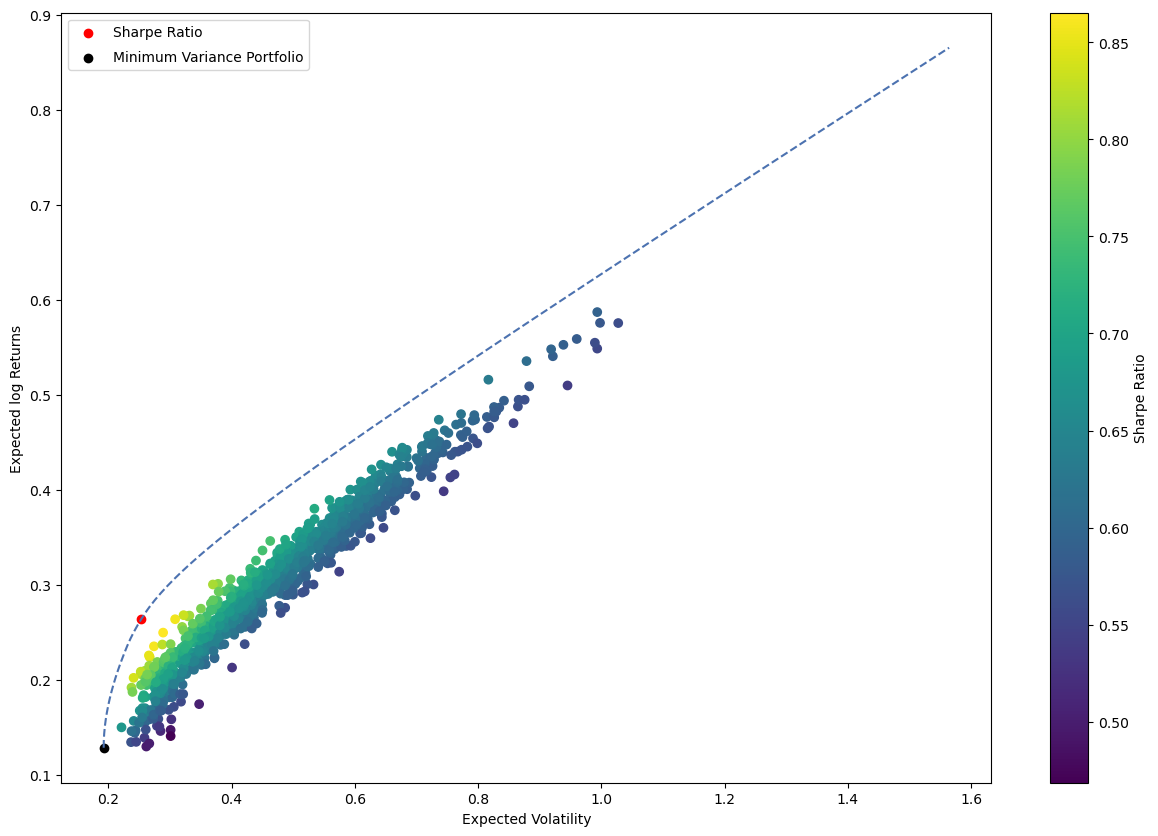

In [1481]:
#Test plot to see if it works
plt.figure(figsize=(15,10))
plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sharpepoint[1], sharpepoint[0], c='red', label='Sharpe Ratio')
plt.scatter(mvp_std, mvp_exr, c='black', label='Minimum Variance Portfolio')
plt.plot(x_axis, y_axis, '--')
plt.legend(labelspacing=0.8)
plt.show()

In [1482]:
tickers_last_price = esg_last_price.columns
np.array(tickers_last_price)

array(['AAPL US Equity', 'TSLA US Equity', 'MSFT US Equity',
       'UEC US Equity', 'DIS US Equity', 'F US Equity', 'EBAY US Equity'],
      dtype=object)

In [1483]:
np.sum(weightlist)

1.000000000000001

In [1484]:
w

array([[0.10739226, 0.16120891, 0.16316031, ..., 0.17115253, 0.05272769,
        0.21750077],
       [0.19872761, 0.18713449, 0.05934791, ..., 0.20099537, 0.0581421 ,
        0.0935873 ],
       [0.19832986, 0.12012998, 0.17235496, ..., 0.18367428, 0.1019772 ,
        0.12005681],
       ...,
       [0.26344921, 0.1565233 , 0.08635701, ..., 0.04527286, 0.20159596,
        0.02587786],
       [0.15366192, 0.31419876, 0.07459991, ..., 0.05872429, 0.0547994 ,
        0.1629921 ],
       [0.19947418, 0.13634642, 0.19574848, ..., 0.1708814 , 0.09732716,
        0.01613851]])

In [1485]:
weightlist

array([0.        , 0.01865708, 0.9580167 , 0.        , 0.        ,
       0.        , 0.02332622])

# log returns

## Interactive effecient frontier - rolling windows

In [1486]:
number_portfolios = 500
counter = 0
for i in range(0,5):
    R_f_point = [0,0.01]
    expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, y_axis, x_axis, weightlist, mvp_exr, mvp_std, w, ticker = portfolio_performance(er[i],cova[i].to_numpy(),number_portfolios,riskfree_rate=0.01)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=expectedVolatility, y=expectedReturn, 
                        marker=dict(color=SharpeRatio, 
                                    showscale=True, 
                                    size=7,
                                    line=dict(width=1),
                                    colorscale="RdBu",
                                    colorbar=dict(title="Sharpe<br>Ratio")
                                    ), 
                        mode='markers',
                        showlegend=True,
                        name='Portfolios',
                        text=[str(np.array(ticker[i])) + "<br>" + str(np.array(w[i]).round(2)) for i in range(len(ticker))]))
    
    fig.add_trace(
    go.Scatter(
        x=x_axis,
        y=y_axis,
        mode="lines",
        line=go.scatter.Line(color="orange"),
        showlegend=True,
        name='EF Portfolio',
        text=[str(np.array(ticker[i])) + "<br>" + str(np.array(w[i]).round(2)) for i in range(len(ticker))]))
    
    fig.add_trace(go.Scatter(x = [mvp_std], y = [mvp_exr],
                         marker=dict(color='red', size=12), 
                         mode='markers',
                         name='MVP',
                         #text=['MVP'],
                         textposition="bottom center",
                         text=[str(np.array(ticker[i])) + "<br>" + str(np.array(w[i]).round(2)) for i in range(len(ticker))]))

    fig.add_trace(go.Scatter(x = [sharpepoint[1]], y = [sharpepoint[0]],
                         marker=dict(color='black', size=12), 
                         mode='markers',
                         name='SR',
                         #text=['SR'],
                         textposition="top center",
                         text=[str(np.array(ticker[i])) + "<br>" + str(np.array(w[i]).round(2)) for i in range(len(ticker))]))
    
    fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1    
    ))
    fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Volatility'),
                  yaxis=dict(title='Expected Return'),
                  title='Effecient frontier for rolling window: ' + str(counter),
                  width=1000,
                  height=600)
    counter += 1
    fig.show()

## Effecient frontier rolling windows

## Tobins seperation

For rolling window=  0
The maximum Sharpe ratio portfolio is:
Returns: 19.38%
Volatility: 6.46%
Max sharpe ratio: 2.85


For rolling window=  1
The maximum Sharpe ratio portfolio is:
Returns: 22.94%
Volatility: 10.01%
Max sharpe ratio: 2.19


For rolling window=  2
The maximum Sharpe ratio portfolio is:
Returns: 20.00%
Volatility: 8.39%
Max sharpe ratio: 2.27


For rolling window=  3
The maximum Sharpe ratio portfolio is:
Returns: 28.62%
Volatility: 17.67%
Max sharpe ratio: 1.56


For rolling window=  4
The maximum Sharpe ratio portfolio is:
Returns: 32.92%
Volatility: 17.50%
Max sharpe ratio: 1.82




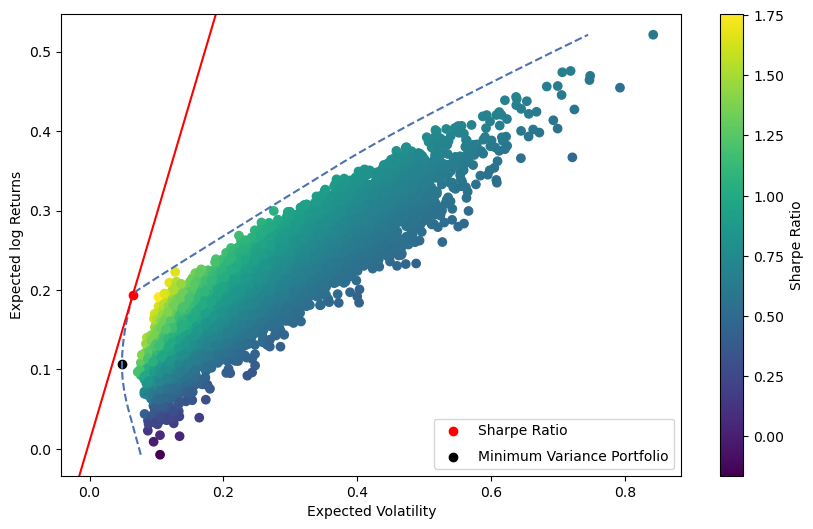

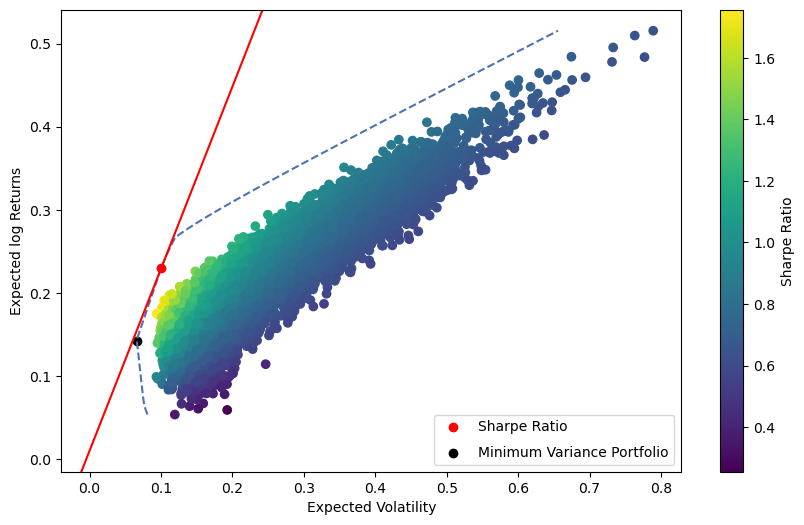

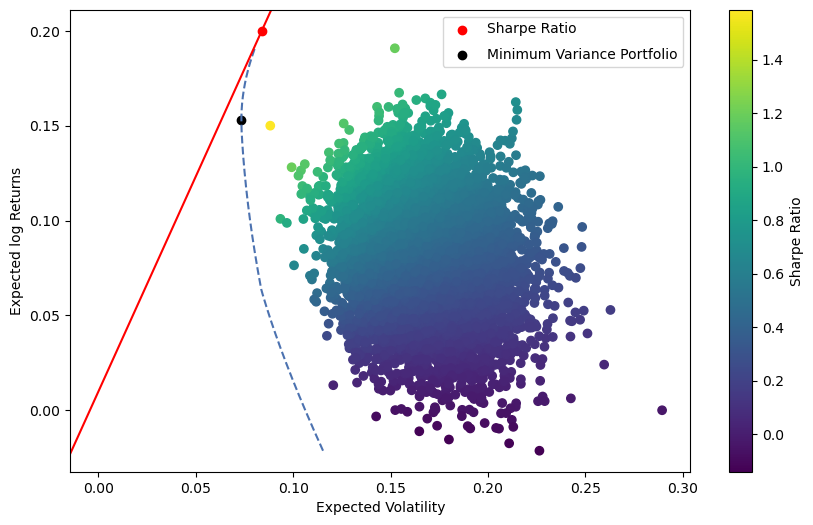

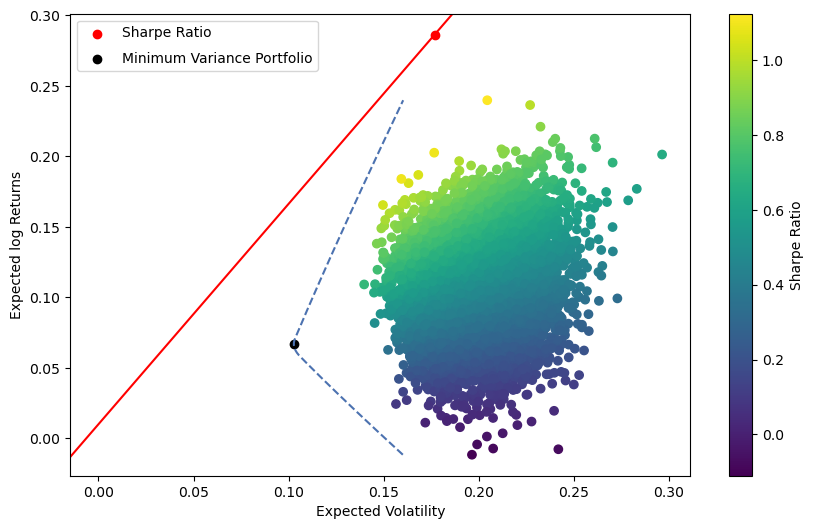

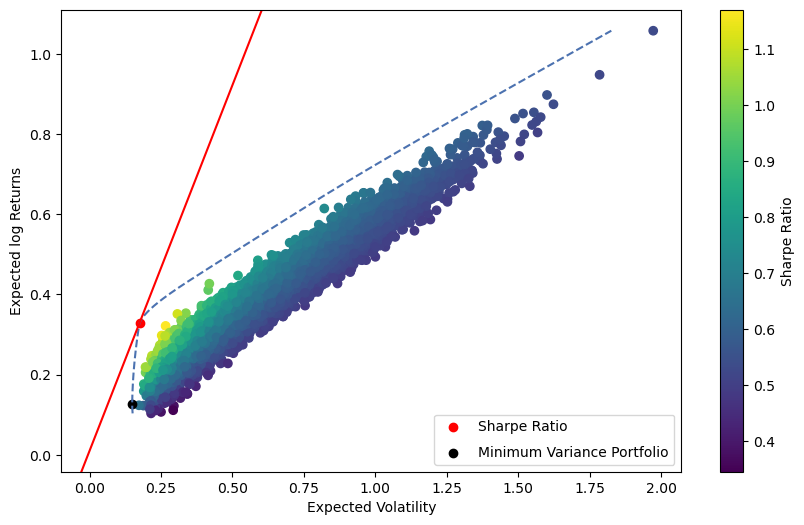

In [1462]:
#Same as before but a line is added that goes between the point on the y-axis and through the optimal portfolio point
num_portfolios = 10000
opt_sharpe = []
opt_weightlist = []

counter = 0
for i in range(0,5):
    R_f_point = [0,0.01]
    expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, y_axis, x_axis, weightlist, mvp_exr, mvp_std, w, ticker = portfolio_performance(er[i],cova[i].to_numpy(),num_portfolios,riskfree_rate=0.01)
    opt_sharpe.append(sharpepoint)
    opt_weightlist.append(weightlist)
    print("For rolling window= ",i)
    print("The maximum Sharpe ratio portfolio is:")
    print(f"Returns: {sharpepoint[0] * 100:.2f}%")
    print(f"Volatility: {sharpepoint[1]* 100:.2f}%")
    print(f"Max sharpe ratio: {sharpepoint[2]:.2f}")
    print("\n")
    plt.figure(figsize=(10,6))
    plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected log Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(sharpepoint[1], sharpepoint[0], c='red', label='Sharpe Ratio')
    plt.scatter(mvp_std, mvp_exr, c='black', label='Minimum Variance Portfolio')
    plt.plot(volatility_opt, y_axis, '--')
    plt.axline(R_f_point,(sharpepoint[1],sharpepoint[0]),color='red')
    plt.legend(labelspacing=0.8)
    name = "rollingwindow" + str(counter) +".png"
    #plt.savefig(name)
    counter += 1

## Filterring function for specific esg score

In [1463]:
opt_weightlist

[array([1.40224922e-01, 3.80069102e-10, 6.11961194e-01, 1.48612659e-10,
        7.85912647e-11, 1.21941989e-10, 2.47813883e-01]),
 array([0.        , 0.        , 0.74110421, 0.        , 0.        ,
        0.        , 0.25889579]),
 array([1.19623210e-09, 2.01243217e-08, 8.35175573e-01, 1.57706935e-09,
        1.64824403e-01, 1.05639672e-09, 8.81947766e-10]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([6.05909331e-13, 1.43707296e-13, 9.98465559e-01, 1.53444121e-03,
        6.34504151e-14, 1.41739486e-13, 9.07480512e-14])]

## Asset allocation

In [1464]:
#Remake the optimal sharpe ratio to a numpy array
opt_sharpe = np.array(opt_sharpe)
opt_sharpe

array([[0.19380007, 0.06457585, 2.84626641],
       [0.22939628, 0.10011215, 2.19150507],
       [0.20000353, 0.08385497, 2.26585879],
       [0.28620728, 0.17673775, 1.56280862],
       [0.32920602, 0.17496977, 1.82434953]])

In [1465]:
#Helper function to find the amount that should be invested in the risk free asset and the risky asset
def tobin_solve(rf,opt_sharpe,target):
    tobin_weights = []
    tobin_vol = []
    for i in range(0,5):
        vol = opt_sharpe[i,1]
        exp = opt_sharpe[i,0]
        print("For i=",i)
        #print("Exp=",exp)
        #print("Vol=",vol)
        
        y = symbols('y')
        expr = rf+((exp-rf)/vol)*y-target

        vol_c = solve(expr)
        
        x = vol_c/vol
        
        tobin_exp = (1-x)*rf + x *exp
        
        print("Amount invested in risky asset=",x[0])
        print("Expected return =",tobin_exp[0])
        print("Expected vol=",vol_c[0])
        print("\n")
        
        tobin_vol.append(vol_c)
        tobin_weights.append(x[0])
    return tobin_weights, tobin_vol

In [1466]:
rf = 0.01
target = 0.10
tobin_weights, tobin_vol = tobin_solve(rf,opt_sharpe,target)
print(tobin_weights)

For i= 0
Amount invested in risky asset= 0.489662484278860
Expected return = 0.100000000000000
Expected vol= 0.0316203710372352


For i= 1
Amount invested in risky asset= 0.410216608842861
Expected return = 0.100000000000000
Expected vol= 0.0410676667831914


For i= 2
Amount invested in risky asset= 0.473675418029427
Expected return = 0.100000000000000
Expected vol= 0.0397200392856150


For i= 3
Amount invested in risky asset= 0.325842245494160
Expected return = 0.0999999999999997
Expected vol= 0.0575886251464390


For i= 4
Amount invested in risky asset= 0.281949569229758
Expected return = 0.100000000000000
Expected vol= 0.0493326516393208


[0.489662484278860, 0.410216608842861, 0.473675418029427, 0.325842245494160, 0.281949569229758]


In [1467]:
tobin_weights = np.array(tobin_weights)
tobin_weights

array([0.489662484278860, 0.410216608842861, 0.473675418029427,
       0.325842245494160, 0.281949569229758], dtype=object)

In [1468]:
#Helper function to find the turnover change
def turnover(tobin_weights,opt_weightlist):
    
    x_turnover = []
    weights_turnover = []
    #opt_scaled = []
    
    for i in range(0,5):
        #opt_scaled.append(tobin_weights[i]*opt_weightlist[i])
        #opt_scaled.append(tobin_weights[i+1]*opt_weightlist[i+1])
        
        x_turnover.append(abs(tobin_weights[i]-tobin_weights[i+1]))
        
        weights_turnover.append(np.sum(np.abs((tobin_weights[i]*opt_weightlist[i])-(tobin_weights[i+1]*opt_weightlist[i+1]))))
    
    return x_turnover, weights_turnover

In [1469]:
x_turnover, weights_turnover = turnover(tobin_weights,opt_weightlist)

IndexError: index 5 is out of bounds for axis 0 with size 5